<h2>Yanjie Zhou
<h2>MACS 30100
<h2>Dr. Waggoner
<h2>2020 March 6th

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

# 1

In [7]:
np.random.seed(1234)

x1 = np.random.uniform(-1,1,100)
x2 = np.random.uniform(-1,1,100)
err = np.random.normal(0,1,100)

In [8]:
y = x1 + x1 ** 2 + x2 + x2**2 + err
y_norm = (y-np.min(y))/(np.max(y)-np.min(y))
success = y_norm > 0.5
failure = y_norm <= 0.5

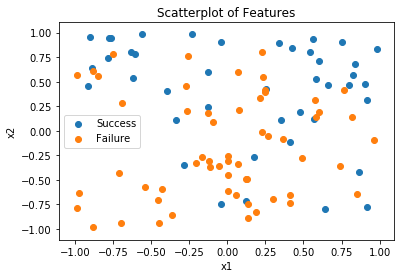

In [19]:
plt.scatter(x1[success], x2[success])
plt.scatter(x1[failure], x2[failure])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Success', 'Failure'])
plt.title('Scatterplot of Features');

In [57]:
x = pd.DataFrame({'x1': x1, 'x2': x2})
x_train, x_test, y_train, y_test = train_test_split(x, success, test_size=0.2, random_state=123)
svm_radial = SVC(kernel='rbf').fit(x_train, y_train)
svm_linear = SVC(kernel='linear').fit(x_train, y_train)

In [58]:
print('Radial Kernel:')
print('Training error:', 1-svm_radial.score(x_train, y_train))
print('Test error:', 1-svm_radial.score(x_test, y_test))

Radial Kernel:
Training error: 0.15000000000000002
Test error: 0.15000000000000002


In [59]:
print('Linear Kernel:')
print('Training error:', 1-svm_linear.score(x_train, y_train))
print('Test error:', 1-svm_linear.score(x_test, y_test))

Linear Kernel:
Training error: 0.16874999999999996
Test error: 0.125


According to the error rates, radial kernel performs better than linear kernel on the test set, but a support vector classifier outperforms radial kernel on the training set.

# 2

In [15]:
x3 = np.random.uniform(-1,1,500)
x4 = np.random.uniform(-1,1,500)
err2 = np.random.normal(0,1,500)

y2 = x3 + x3 ** 2 + x4 + x4**2 + err2
y2_norm = (y2-np.min(y2))/(np.max(y2)-np.min(y2))
success2 = y2_norm > 0.5
failure2 = y2_norm <= 0.5

# 3

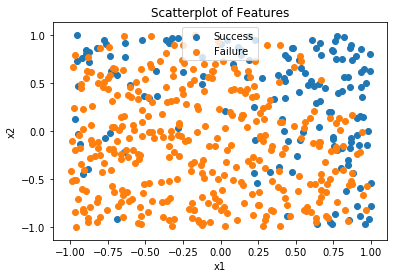

In [18]:
plt.scatter(x3[success2], x4[success2])
plt.scatter(x3[failure2], x4[failure2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Success', 'Failure'])
plt.title('Scatterplot of Features');

# 4 

In [22]:
x_log = pd.DataFrame({'x1': x3, 'x2': x4})
lr = LogisticRegression().fit(x_log, success2)

# 5

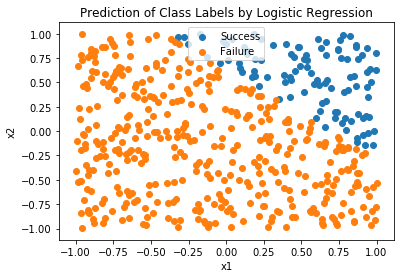

In [39]:
lr_pred = lr.predict(x_log)

plt.scatter(x3[lr_pred], x4[lr_pred])
plt.scatter(x3[~lr_pred], x4[~lr_pred])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Success', 'Failure'])
plt.title('Prediction of Class Labels by Logistic Regression');

# 6

In [27]:
x_square = pd.DataFrame({'x1^1': x3 ** 2, 'x2^2': x4 ** 2, 'x1*x2': x3 * x4})
lrs = LogisticRegression().fit(x_square, success2)

# 7

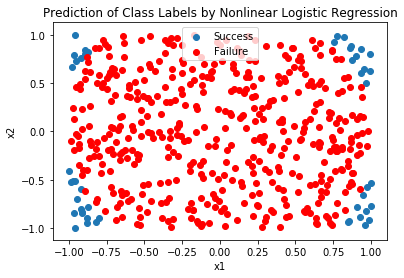

In [38]:
lrs_pred = lrs.predict(x_square)

plt.scatter(x3[lrs_pred], x4[lrs_pred])
plt.scatter(x3[~lrs_pred], x4[~lrs_pred], color='red')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Success', 'Failure'])
plt.title('Prediction of Class Labels by Nonlinear Logistic Regression');

# 8

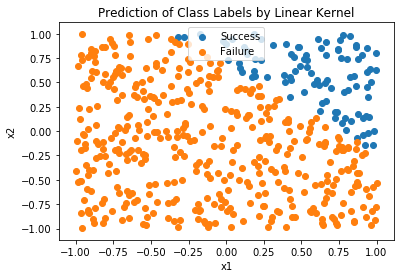

In [37]:
svc = SVC(kernel='linear').fit(x_log, success2)
svc_pred = svc.predict(x_log)

plt.scatter(x3[svc_pred], x4[svc_pred])
plt.scatter(x3[~svc_pred], x4[~svc_pred])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Success', 'Failure'])
plt.title('Prediction of Class Labels by Linear Kernel');

# 9

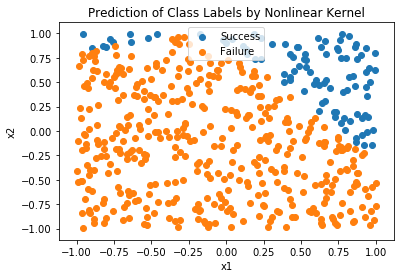

In [56]:
svm = SVC(kernel='rbf').fit(x_log, success2)
svm_pred = svm.predict(x_log)

plt.scatter(x3[svm_pred], x4[svm_pred])
plt.scatter(x3[~svm_pred], x4[~svm_pred])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Success', 'Failure'])
plt.title('Prediction of Class Labels by Nonlinear Kernel');

# 10

In [41]:
print('Accuracy')
print('Logistic regression with x1, x2:', lr.score(x_log, success2))
print('Logistic regression with non-linear function:', lrs.score(x_square, success2))
print('SVM linear kernel:', svc.score(x_log, success2))
print('SVM radial kernel:', svm.score(x_log, success2))

Accuracy
Logistic regression with x1, x2: 0.792
Logistic regression with non-linear function: 0.704
SVM linear kernel: 0.792
SVM radial kernel: 0.8


According to the measure of accuracy, SVM non-linear kernel has the best performance, with non-linear logistic function performing the worst. Regarding estimating non-linear decision boundaries, SVM non-linear kernel is a better choice compared with non-linear logistic regression which needs an accurate estimate of the forms of predictors, but considering that the SVM method is computationally intense, we have to make the tradeoff between computation and accuracy of the model.

# 11

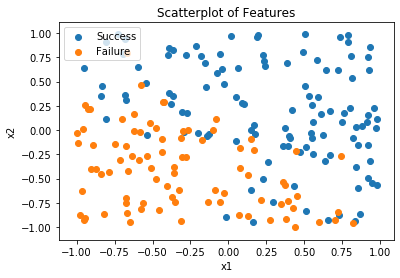

In [44]:
x1 = np.random.uniform(-1,1,200)
x2 = np.random.uniform(-1,1,200)
err = np.random.normal(0,0.4,200)
y = x1 + x2 + err

y_norm = (y-np.min(y))/(np.max(y)-np.min(y))
success = y_norm > 0.4
failure = y_norm <= 0.4

plt.scatter(x1[success], x2[success])
plt.scatter(x1[failure], x2[failure])
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['Success', 'Failure'])
plt.title('Scatterplot of Features');

# 12

In [45]:
x = pd.DataFrame({'x1': x1, 'x2': x2})
x_train, x_test, y_train, y_test = train_test_split(x, success, test_size=0.2)
costs = [2 ** (i) for i in range(-10, 10)]

cv_err = []
training_err = []
for cost in costs:
    model = SVC(C=cost, kernel='linear')
    cv = 1 - np.mean(cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy'))
    cv_err.append(cv)
    train = 1 - model.fit(x_train, y_train).score(x_train, y_train)
    training_err.append(train)

err_df = pd.DataFrame({'Cost': costs, 'CV Error': cv_err, 'Training Error': training_err})

In [46]:
err_df

,Cost,CV Error,Training Error
0,0.000977,0.43125,0.43125
1,0.001953,0.43125,0.43125
2,0.003906,0.43125,0.43125
3,0.007812,0.43125,0.43125
4,0.015625,0.40000,0.36250
5,0.031250,0.18750,0.17500
6,0.062500,0.16250,0.15000
7,0.125000,0.16250,0.14375
8,0.250000,0.14375,0.14375
9,0.500000,0.14375,0.13125


When C increases from 2^-10 to 0.5, the cross validation error keeps decreasing with the training error. But when C is larger than 0.5, the cross validation error begins to hover around 0.15, with the training error hovering around 0.1375.

# 13

In [47]:
test_err = []
for cost in costs:
    model = SVC(C=cost, kernel='linear')
    test = 1 - model.fit(x_test, y_test).score(x_test, y_test)
    test_err.append(test)

test_df = pd.DataFrame({'Cost': costs, 'Test Error': test_err})

In [48]:
test_df

,Cost,Test Error
0,0.000977,0.425
1,0.001953,0.425
2,0.003906,0.425
3,0.007812,0.425
4,0.015625,0.425
5,0.031250,0.425
6,0.062500,0.225
7,0.125000,0.125
8,0.250000,0.100
9,0.500000,0.125


We can find that when C = 1 or is larger than 8, the test error reaches the minimal value 0.075. If we consider the cost values that yield the fewest cross validation errors and training errors at the same time, we can conclude that when C is larger than 32, all the errors reach their minimal values.

# 14

Our results suggest that when the data is just barely linearly separable, choosing a smaller value of C, or in other words choosing a higher degree of regularization, can avoid the problem of overfitting by constraining the large values of coefficients. Thus, a support vector classifier which misclassifies a couple of training observations can still perform well on the test set.

# 15

In [49]:
gss_train = pd.read_csv("gss_train.csv")
gss_test = pd.read_csv("gss_test.csv")
x_train = gss_train.drop('colrac',axis=1)
y_train = gss_train['colrac']

In [54]:
costs = [2 ** (i) for i in range(-10, 5)]
cv_error = []
for cost in costs:
    model = SVC(C=cost, kernel='linear')
    cv = 1 - np.mean(cross_val_score(model, x_train, y_train, cv=10, scoring='accuracy'))
    cv_error.append((cost, cv))
cv_error

[(0.0009765625, 0.24185971685971686),
 (0.001953125, 0.22901268615554338),
 (0.00390625, 0.21004780290494574),
 (0.0078125, 0.2059753631182203),
 (0.015625, 0.20258319544033832),
 (0.03125, 0.2025740025740026),
 (0.0625, 0.20325887111601404),
 (0.125, 0.20868725868725868),
 (0.25, 0.20798860084574367),
 (0.5, 0.20392535392535394),
 (1, 0.205952380952381),
 (2, 0.20799319727891163),
 (4, 0.20866887295458725),
 (8, 0.21002482073910644),
 (16, 0.21002482073910644)]

Except for the 2^-10 of cost value, all the cross validation errors do not change much as the cost value increases, which matches our former investigation about the fact that SVM model with a smaller cost value can also have a satisfying error rate.

# 16

In [62]:
models = {
SVC(kernel='rbf'): {'C': [2 ** (i) for i in range(-9, 5)], 'gamma': ['scale', 'auto']},
SVC(kernel='poly'): {'C': [2 ** (i) for i in range(-9, 5)], 'degree': [2, 3, 4, 5],'gamma': ['scale', 'auto']}
}
for model, param in models.items():
    gscv = GridSearchCV(model, param, cv=10, refit=True)
    gscv.fit(x_train, y_train)
    print(gscv.best_estimator_)
    print(gscv.best_score_)
    print('-----------------')

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8375
-----------------
SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.7875
-----------------


As the results show, the best gamma for both radial and polynomial kernel SVMs is <code>auto</code>, which means that the models 1 / (n_features * X.var()) as value of gamma. For the polynomial kernels, the best degree of the polynomial kernel function is 3. The best cost value for radial kernel SVM is 0.5, and the best cost value for linear kernel SVM is 4. The accuracy of radial kernel is better than linear kernel, while the latter is more computationally efficient, which leads to the tradeoff between accuracy and computation.